In [21]:
import os
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

os.environ['TF_METAL_DEVICE_PLACEMENT'] = 'metal:0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [22]:
import pandas as pd
import numpy as np
import string
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('../datasets/cleaned_datasets/cleaned_depression_dataset.csv')
df.head()

,text,score
0,"['ex', 'wife', 'threatening', 'suiciderecently...",0
1,"['weird', 'dont', 'get', 'affected', 'complime...",1
2,"['finally', '2020', 'almost', 'never', 'hear',...",1
3,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",0
4,"['im', 'losthello', 'name', 'adam', '16', 'ive...",0


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['score'], test_size=0.2, random_state=42)

In [25]:
# Tokenize the tweets
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [26]:
# Pad the sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [27]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(5000, 32))
model.add(LSTM(32, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [28]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

In [30]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/5
5801/5801 [==============================] - 74s 13ms/step - loss: 0.3715 - accuracy: 0.8525 - val_loss: 0.5645 - val_accuracy: 0.6837
Epoch 2/5
5801/5801 [==============================] - 74s 13ms/step - loss: 0.3596 - accuracy: 0.8556 - val_loss: 0.2206 - val_accuracy: 0.9186
Epoch 3/5
5801/5801 [==============================] - 72s 12ms/step - loss: 0.1778 - accuracy: 0.9357 - val_loss: 0.1501 - val_accuracy: 0.9439
Epoch 4/5
5801/5801 [==============================] - 72s 12ms/step - loss: 0.1394 - accuracy: 0.9488 - val_loss: 0.1374 - val_accuracy: 0.9474
Epoch 5/5
5801/5801 [==============================] - 72s 12ms/step - loss: 0.1260 - accuracy: 0.9540 - val_loss: 0.1414 - val_accuracy: 0.9469


In [31]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 94.692838


In [32]:
# Save model
model.save('final_models/lstm_e5_b32_es.h5')

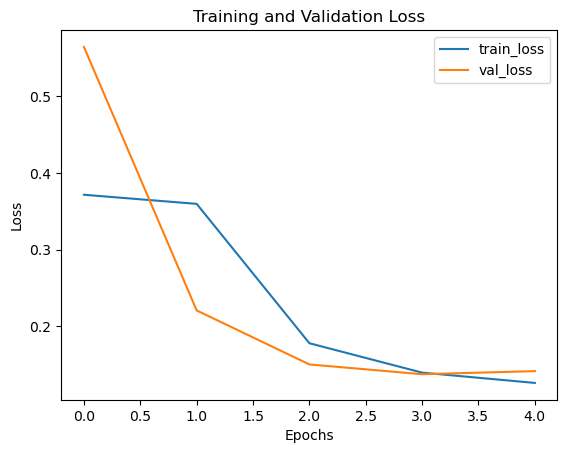

In [33]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

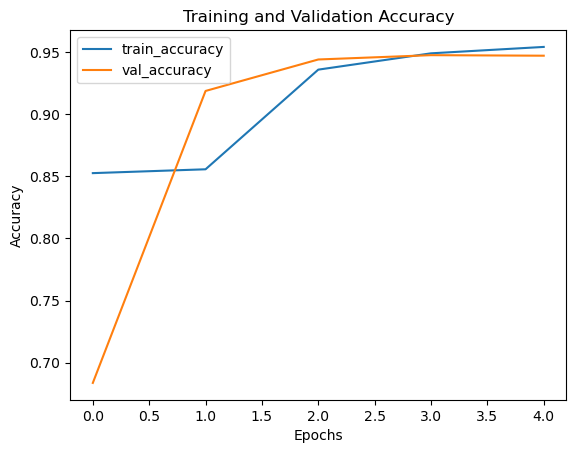

In [34]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1451/1451 [==============================] - 5s 3ms/step - loss: 0.1414 - accuracy: 0.9469
Test Loss: 0.14138756692409515
Test Accuracy: 0.9469283819198608


In [38]:
y_pred = model.predict(X_test)
print(y_pred)

1451/1451 [==============================] - 5s 3ms/step
[[0.3523018 ]
 [0.00723347]
 [0.96828675]
 ...
 [0.9970855 ]
 [0.00533393]
 [0.9993075 ]]
